## Predicting the International vs. Domestic Share of Box Office Revenue 
By: Olivia Offutt

### ABSTRACT
Inspired by a news article discussing how the Chinese government's censorship impacts the kinds of movies hollywood distributors will make (in order to capitalize on huge Chinese markets), I wanted to explore the use Box Office Mojo movie data to see if I could predict how well a US made (ie domestic) movie would do in international markets.

This regression analysis uses scraped movie data from the Box Office Mojo website. Nearly 100 variables from 1000 domestic movies were scraped from the <a href = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?ref_=bo_cso_ac'>Top Lifetime Grosses page</a> and compiled into a data frame. After testing various models, I identified the Lasso Regression model as having the most predictive power at a modest R^2 value of .33 and a MAE value of .086. 

### DESIGN


Aggregating MTA turnstile data and National Weather Service by week, this analysis observes trends of ridership around storms for work weeks and weekends, as well as identifying the top ten stations that experienced significant ridership drops both acutely (during storm weeks) and chronically (enduring post storm weeks). This provides a starting point for identifying stations that should be prioritized for capital improvement planning to prevent future station service impacts as extreme weather becomes more common.

### DATA
- Sample Selection: 1000 scraped URLs from the Top Lifetime Grosses page, chosen because it was the only obvious aggregation of domestic movie URLs on the site with a large enough n value for this project

- Target Variable (n = 1): International Revenue %
- Feature Variables (n = 95): 
    - Numeric Vars: [Year, Run Time, Budget (adjusted for inflation)]
    - Categorical Vars: [Distributor, Rating, Genres, Directors, Actors, Release Month]
        - Categorical variables were exploded into 0,1 dummy variables, and categorical variables with few data points were bucketed as 'Other'    


### TOOLS
- Web Scraping: BeautifulSoup
- Data Management: Pickle
- Cleaning and Analysis: Pandas, Numpy
- Data Visualization: Matplotlib and Seaborn
- Regression Analysis: SciKitLearn, statsmodels

### ALGORITHMS
- **OLS**:
    - Fit a regression to the Box Office Mojo data to review the data and begin necessary feature engineering
    - Identified some heterskedasticity in the residuals and attempted to correct with target transformations (unfortunately, both log and sqrt transformations made the skew worse, so I left the target in its standard form)
    - Used pairplots, heatmaps, and VIF analysis to ID any collinearity (removed MPAA rating)
- **Feature Engineering**:
    - Drop target variable null value rows 
    - Replace feature variable null values with median and means as appropriate based on skew
    - Create 0,1 dummy varaibles for categorical data, bucketing as necessary
    - Drop variables with high indicators of collinearity (ie movie MPAA rating)
- **Model training and testing**:
    - Using robust cross validation methods (because of relatively small/medium dataset size), trained and tested 4 regression models scored for explanation power (R^2 value) and magnitude of error value (MAE):
        - *Standard OLS, cross validated (KFold)*: 
            - R^2 = 0.33 +- 0.11
            - MAE = 0.1 +- 0.01
        - *Polynomial OLS, cross validated (KFold))*:
            - R2 = -0.21 +- 0.36
            - MAE = 0.13 +- 0.02
        - *Ridge Regression, cross validated (RidgeCV))*: 
            - R2 = .29
            - MAE = 0.09
        - *Lasso Regression, cross validated (LassoCV))*: 
            - R2 = .33
            - MAE = 0.09
 
### COMMUNICATION
- A slide deck and presentation showing key findings.

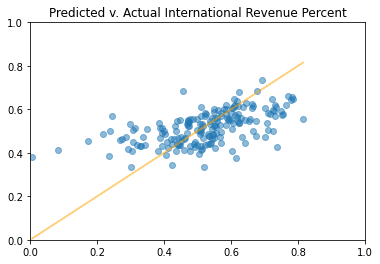